In [2]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt 
import math
import seaborn as seabornInstance 
import statistics as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split  

In [3]:
data=pd.read_csv('AR_2_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
x=data.iloc[:,1]
z=data.iloc[:,2]

print(stats.stdev(y))
print(data)

0.6103705461054466
           A         B        C
0   0.240217  45.32733  0.31478
1   2.175642  44.51848  0.07224
2   0.055222  44.32612  0.01430
3   0.060443  44.69770  0.00526
4   0.070739  44.30242  0.01505
..       ...       ...      ...
65  0.259238  44.54921  0.06313
66  0.380197  44.65970  0.01427
67  0.393662  44.79900  0.00287
68  0.683897  44.18964  0.16066
69  0.346123  44.25669  0.01856

[69 rows x 3 columns]


In [4]:
data.describe()

,A,B,C
count,69.000000,69.000000,69.000000
mean,0.620652,44.597769,0.053283
std,0.610371,0.317333,0.057819
min,0.044262,44.084260,0.001460
25%,0.225057,44.331250,0.013930
50%,0.393662,44.570330,0.031930
75%,0.884513,44.799000,0.066890
max,3.391098,45.679790,0.314780


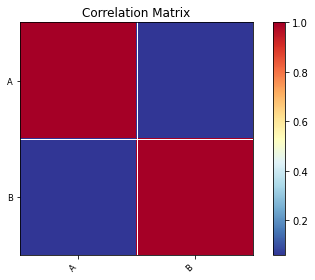

In [5]:
corr = data.set_index('C').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  0.1114483644715608
intercepción b0 is -4.349696143096017


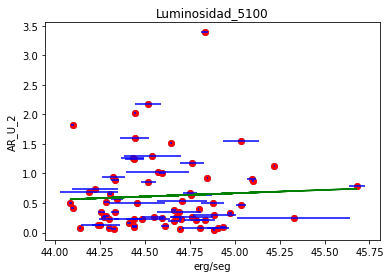

In [5]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_U_2')
plt.savefig("Luminosidad_5100_AR_U_2.pdf")

In [6]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)


Pendiente : [[0.11144836]
 [1.        ]]
Intercepción: [-4.34969614  0.        ]
Errorcuadratico medio : 0.182960125427232
Raiz del error cuadratico medio:  0.4277383843276542
 Coeficiente de determinacion R2 :  0.5016786540611542


In [7]:
data=pd.read_csv('AR_2_G.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
x=data.iloc[:,1]
z=data.iloc[:,2]

print(stats.stdev(y))
print(data)

4.33284755259398
           A         B        C
0   5.715810  45.32733  0.31478
1   2.637592  44.51848  0.07224
2   0.531011  44.32612  0.01430
3   0.183625  44.69770  0.00526
4   7.928892  44.30242  0.01505
..       ...       ...      ...
74  3.426947  44.78145  0.09942
75  0.739036  44.77507  0.07369
76  0.113311  44.36424  0.00708
77  0.562392  44.17580  0.04911
78  0.297777  44.40151  0.00523

[78 rows x 3 columns]


In [8]:
data.describe()

,A,B,C
count,78.000000,78.000000,78.000000
mean,2.341155,44.585077,0.055344
std,4.332848,0.312664,0.058159
min,0.033734,44.084260,0.001460
25%,0.415577,44.331250,0.014278
50%,1.196129,44.554820,0.034470
75%,3.071642,44.783978,0.073327
max,35.608858,45.679790,0.314780


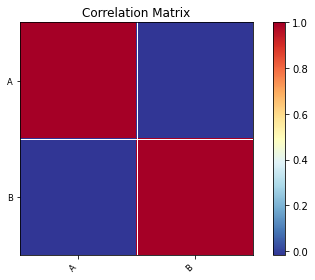

In [9]:
corr = data.set_index('C').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  -0.25609173272147245
intercepción b0 is 13.759024718950522


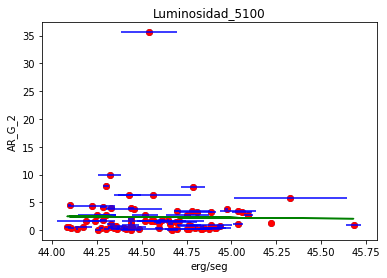

In [10]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_G_2')
plt.savefig("Luminosidad_5100_AR_G_2.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

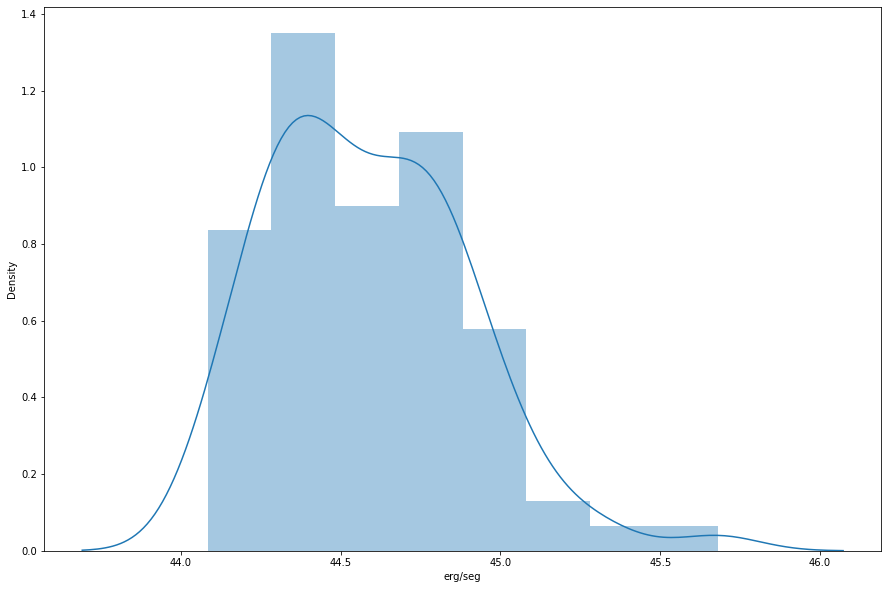

In [12]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['B'])
plt.xlabel('erg/seg')

In [13]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)


Pendiente : [[-0.25609173]
 [ 1.        ]]
Intercepción: [13.75902472  0.        ]
Errorcuadratico medio : 9.263276013329325
Raiz del error cuadratico medio:  3.043563045729351
 Coeficiente de determinacion R2 :  0.5001707537857365


In [14]:
data=pd.read_csv('AR_2_R.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
x=data.iloc[:,1]
z=data.iloc[:,2]

print(stats.stdev(y))
print(data)

1.1047409809814466
           A         B        C
0   0.783238  45.32733  0.31478
1   1.910053  44.51848  0.07224
2   0.043060  44.32612  0.01430
3   0.082514  44.69770  0.00526
4   0.418695  44.30242  0.01505
..       ...       ...      ...
78  4.409960  44.40151  0.00523
79  0.707021  44.20654  0.02390
80  0.214624  44.59746  0.00671
81  2.052198  44.17015  0.06091
82  1.337782  44.31297  0.01773

[83 rows x 3 columns]


In [15]:
data.describe()

,A,B,C
count,83.000000,83.000000,83.000000
mean,1.070597,44.578615,0.053373
std,1.104741,0.315858,0.057124
min,0.033134,44.084260,0.001460
25%,0.202613,44.324415,0.014100
50%,0.607640,44.549210,0.032770
75%,1.673950,44.783135,0.069565
max,4.409960,45.679790,0.314780


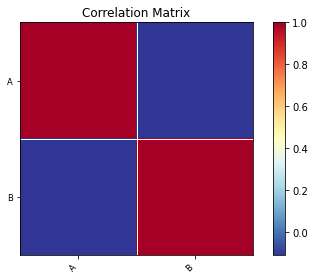

In [16]:
corr = data.set_index('C').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  -0.39293554084414406
intercepción b0 is 18.587118937612264


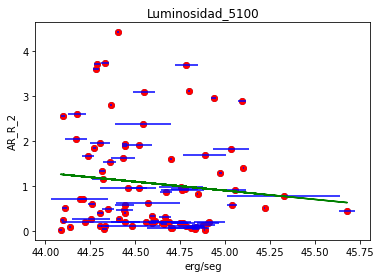

In [17]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_R_2')
plt.savefig("Luminosidad_5100_AR_R_2.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

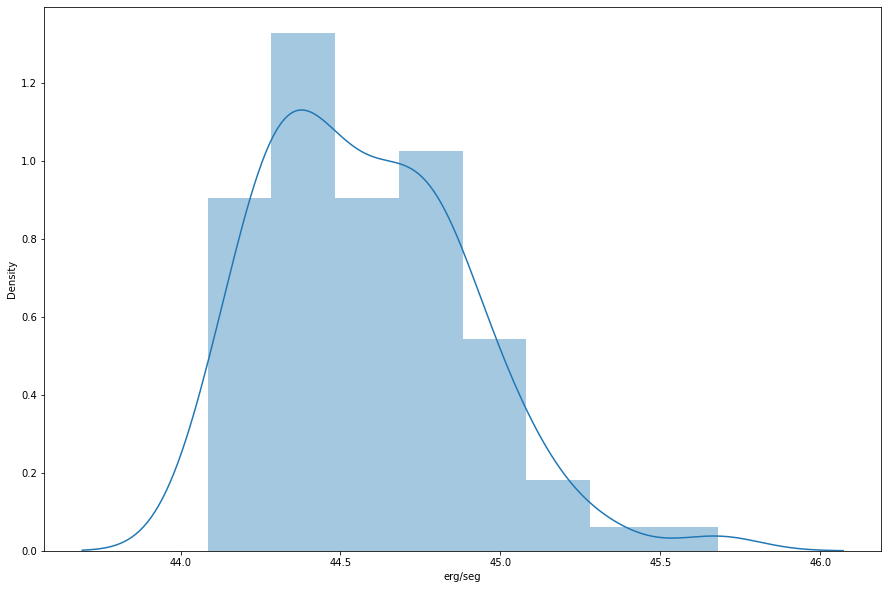

In [19]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['B'])
plt.xlabel('erg/seg')

In [20]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.39293554]
 [ 1.        ]]
Intercepción: [1.85871189e+01 7.10542736e-15]
Errorcuadratico medio : 0.5952651319288849
Raiz del error cuadratico medio:  0.7715342713897322
 Coeficiente de determinacion R2 :  0.5063106543446321


In [21]:
data=pd.read_csv('AR_I_.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
x=data.iloc[:,1]
z=data.iloc[:,2]
print(stats.stdev(x))
print(stats.stdev(y))
print(data)

0.31641093854392366
1.7950862202796174
           A         B        C
0   2.624631  45.32733  0.31478
1   2.510650  44.51848  0.07224
2   0.114183  44.32612  0.01430
3   0.129539  44.69770  0.00526
4   0.115155  44.30242  0.01505
..       ...       ...      ...
77  0.450390  44.17580  0.04911
78  0.772785  44.40151  0.00523
79  1.250476  44.20654  0.02390
80  2.436343  44.59746  0.00671
81  1.824101  44.17015  0.06091

[82 rows x 3 columns]


In [22]:
data.describe()

,A,B,C
count,82.000000,82.000000,82.000000
mean,1.395247,44.581855,0.053808
std,1.795086,0.316411,0.057337
min,0.084309,44.084260,0.001460
25%,0.285252,44.327403,0.014015
50%,0.746702,44.554820,0.033590
75%,1.946111,44.783978,0.070902
max,12.091779,45.679790,0.314780


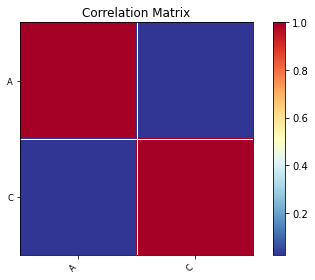

In [23]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  0.18080694017546567
intercepción b0 is -6.66546191068335


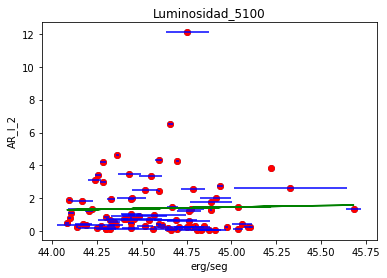

In [24]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_I_2')
plt.savefig("Luminosidad_5100_AR_I_2.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

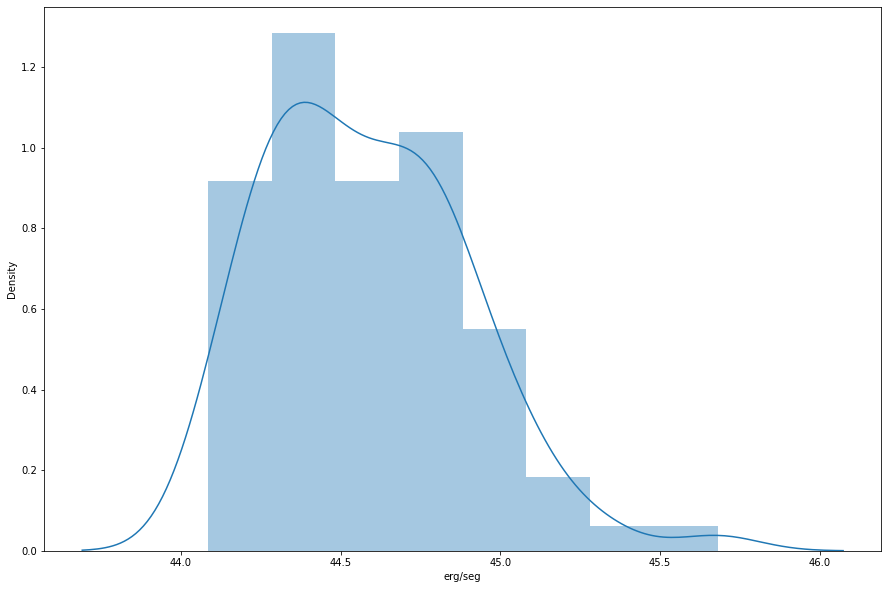

In [25]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['B'])
plt.xlabel('erg/seg')

In [26]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[0.18080694]
 [1.        ]]
Intercepción: [-6.66546191  0.        ]
Errorcuadratico medio : 1.5899023928762532
Raiz del error cuadratico medio:  1.260913316955711
 Coeficiente de determinacion R2 :  0.5005078465999724


In [27]:
data=pd.read_csv('AR_2_Z.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
x=data.iloc[:,1]
z=data.iloc[:,2]

print(stats.stdev(y))
print(data)

0.4168920828447056
           A         B        C
0   0.589306  45.32733  0.31478
1   0.281835  44.51848  0.07224
2   0.156123  44.32612  0.01430
3   0.391727  44.69770  0.00526
4   1.529968  44.30242  0.01505
..       ...       ...      ...
80  0.245100  44.59746  0.00671
81  0.108758  44.17015  0.06091
82  0.617275  44.31297  0.01773
83  0.159126  44.52867  0.01500
84  0.094828  44.68251  0.01940

[84 rows x 3 columns]


In [28]:
data.describe()

,A,B,C
count,84.000000,84.000000,84.000000
mean,0.490643,44.584493,0.053079
std,0.416892,0.310418,0.056816
min,0.072795,44.084260,0.001460
25%,0.215786,44.329967,0.014292
50%,0.352926,44.554820,0.032350
75%,0.613713,44.782292,0.068227
max,1.782542,45.679790,0.314780


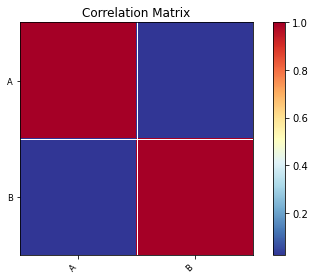

In [30]:
corr = data.set_index('C').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  0.029368771442492506
intercepción b0 is -0.8187489738073847


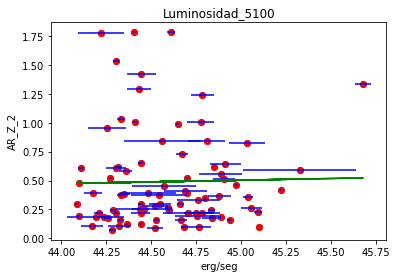

In [31]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_Z_2')
plt.savefig("Luminosidad_5100_AR_Z_2.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

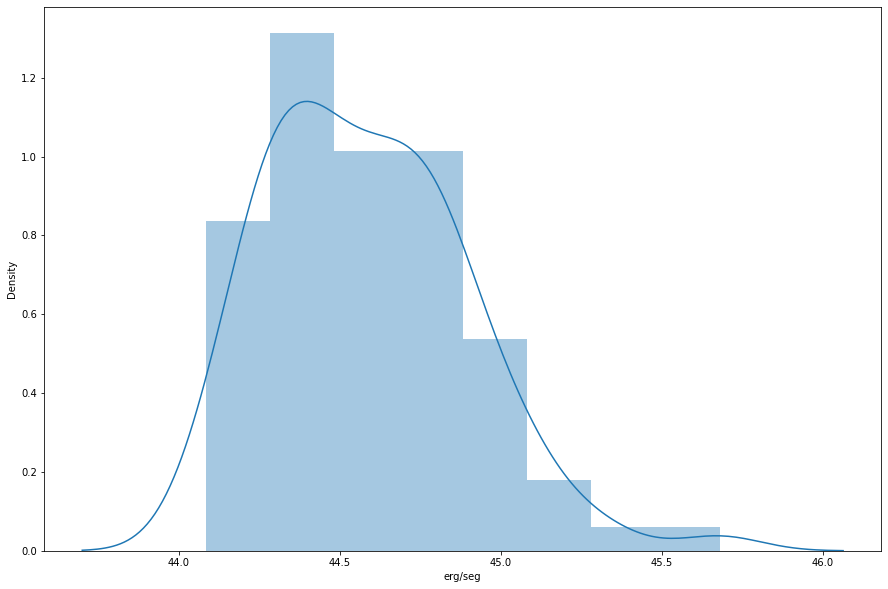

In [32]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['B'])
plt.xlabel('erg/seg')

In [33]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[0.02936877]
 [1.        ]]
Intercepción: [-8.18748974e-01  7.10542736e-15]
Errorcuadratico medio : 0.08582392497191697
Raiz del error cuadratico medio:  0.2929572067246631
 Coeficiente de determinacion R2 :  0.5002391049595181
